# Predicting the progression of diabetes using least-squares regression

The **diabetes** data set is provided as a single file, `diabetes-data.csv`. We obtained it at https://web.stanford.edu/~hastie/Papers/LARS/diabetes.data. For some background information on the data, see this seminal paper:

Bradley Efron, Trevor Hastie, Iain Johnstone and Robert Tibshirani (2004) "Least Angle Regression," Annals of Statistics (with discussion), 407-499.

## Set up notebook and load data set

In [1]:
# Standard includes
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# Routines for linear regression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
# Set label size for plots
matplotlib.rc('xtick', labelsize=14) 
matplotlib.rc('ytick', labelsize=14)

This next snippet of code loads in the diabetes data. There are 442 data points, each with 10 predictor variables (which we'll denote `x`) and one response variable (which we'll denote `y`).

Make sure the file `'diabetes-data.csv'` is in the same directory as this notebook.

In [2]:
data = np.genfromtxt('diabetes-data.csv', delimiter=',')
features = ['age', 'sex', 'body mass index', 'blood pressure', 
            'serum1', 'serum2', 'serum3', 'serum4', 'serum5', 'serum6']
x = data[:,0:10] # predictors
y = data[:,10] # response variable

In [3]:
x.shape, y.shape

((442, 10), (442,))

## Predict `y` without using `x`

If we want to predict `y` without knowledge of `x`, what value would be predict? The <font color="magenta">mean</font> value of `y`.

In this case, the mean squared error (MSE) associated with the prediction is simply the variance of `y`.

In [4]:
print ("Prediction: %0.4f "% np.mean(y))
print ("Mean squared error: %0.4f "% np.var(y))

Prediction: 152.1335 
Mean squared error: 5929.8849 


## Predict `y` using a single feature of `x`

To fit a linear regression model, we could directly use the formula we saw in lecture. To make things even easier, this is already implemented in `sklearn.linear_model.LinearRegression()`.

Here we define a function, **one_feature_regression**, that takes `x` and `y`, along with the index `f` of a single feature and fits a linear regressor to `(x[f],y)`. It then plots the data along with the resulting line.

In [5]:
def one_feature_regression(x,y,f):
    if (f < 0) or (f > 9):
        print ("Feature index is out of bounds")
        return
    x1 = x[:,[f]]
    
    ### START CODE HERE ###
    #Craete an object of linear regression
    regr = linear_model.LinearRegression()
    # call the fit method to fit the regression model
    regr.fit(x1,y)
    # Make predictions using the model
    y_pred = regr.predict(x1)
    ### END CODE HERE ###
    
    # Plot data points as well as predictions
    plt.plot(x1, y, 'bo')
    plt.plot(x1, y_pred, 'r-', linewidth=3)
    plt.xlabel(features[f], fontsize=14)
    plt.ylabel('Progression of disease', fontsize=14)
    plt.show()
    print ("Mean squared error: %0.4f "% mean_squared_error(y, y_pred))
    return regr

Let's try this with feature #2 (body mass index).

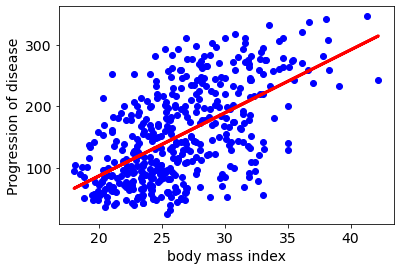

Mean squared error: 3890.4566 
w = 10.2331 
b = -117.7734 


In [6]:
regr = one_feature_regression(x,y,2)
print ("w = %0.4f "% regr.coef_)
print ("b = %0.4f "% regr.intercept_)

<font color="magenta">For you to try:</font> Feature #2 ('body mass index') is the single feature that yields the lowest mean squared error. Which feature is the second best? 

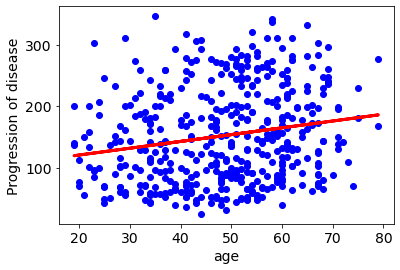

Mean squared error: 5720.5470 


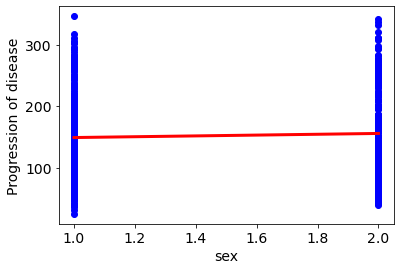

Mean squared error: 5918.8889 


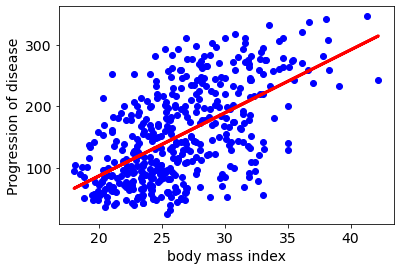

Mean squared error: 3890.4566 


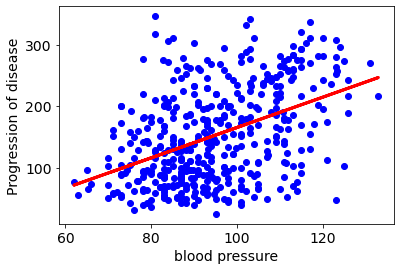

Mean squared error: 4774.1139 


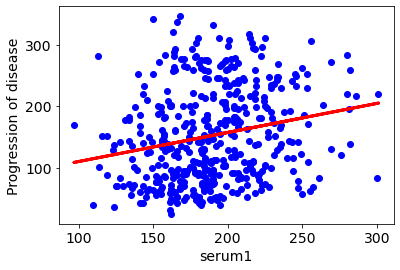

Mean squared error: 5663.3156 


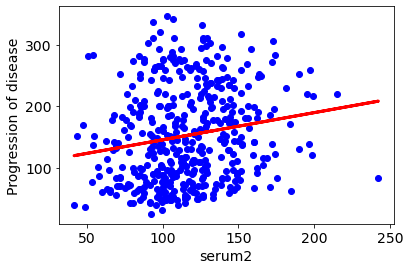

Mean squared error: 5750.2411 


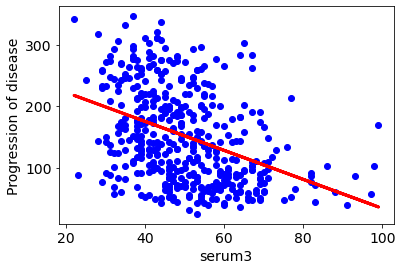

Mean squared error: 5005.6616 


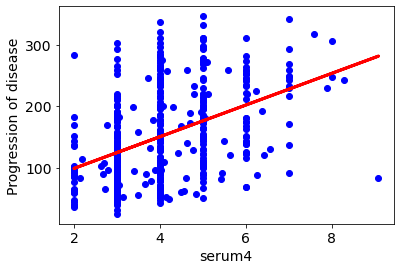

Mean squared error: 4831.1384 


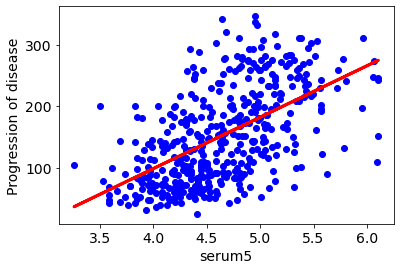

Mean squared error: 4030.9987 


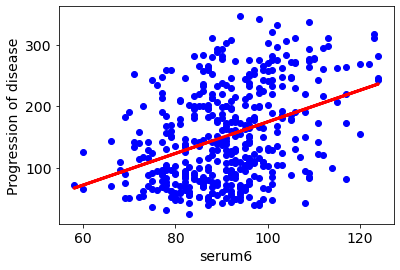

Mean squared error: 5062.3806 


In [7]:
### You can use this space to figure out the second-best feature
for i in range(x.shape[1]):
    one_feature_regression(x,y,i) 

#### We can see that the second-best feature is serum5 with mean squared error = 4030.9987

## Predict `y` using a specified subset of features from `x`

The function **feature_subset_regression** is just like **one_feature_regression**, but this time uses a list of features `flist`.

In [8]:
def feature_subset_regression(x,y,flist):
    if len(flist) < 1:
        print ("Need at least one feature")
        return
    for f in flist:
        if (f < 0) or (f > 9):
            print ("Feature index is out of bounds")
            return

    ### START CODE HERE ###
    x1 = x[:,flist]
    #Craete an object of linear regression
    regr = linear_model.LinearRegression()
    # call the fit method to fit the regression model
    regr.fit(x1,y)

    ### END CODE HERE ###
    return regr

Try using just features #2 (body mass index) and #8 (serum5).

In [9]:
flist = [2,8]
regr = feature_subset_regression(x,y,[2,8])
print ("w = ", regr.coef_)
print ("b = %0.4f "% regr.intercept_)
print ("Mean squared error: %0.4f "% mean_squared_error(y, regr.predict(x[:,flist])))

w =  [ 7.27600054 56.05638703]
b = -299.9575 
Mean squared error: 3205.1901 


Finally, use all 10 features.

In [10]:
regr = feature_subset_regression(x,y,range(0,10))
print ("w = ",regr.coef_)
print ("b = %0.4f "% regr.intercept_)
print ("Mean squared error: %0.4f "% mean_squared_error(y, regr.predict(x)))

w =  [-3.63612242e-02 -2.28596481e+01  5.60296209e+00  1.11680799e+00
 -1.08999633e+00  7.46450456e-01  3.72004715e-01  6.53383194e+00
  6.84831250e+01  2.80116989e-01]
b = -334.5671 
Mean squared error: 2859.6963 


## Splitting the data into a training and test set

We define a procedure **split_data** that partitions the data set into separate training and test sets. It is invoked as follows:

* `trainx, trainy, testx, testy = split_data(n_train)`

Here:
* `n_train` is the desired number of training points
* `trainx` and `trainy` are the training points and response values
* `testx` and `testy` are the test points and response values

The split is done randomly, but the random seed is fixed, and thus the same split is produced if the procedure is called repeatedly with the same `n_train` parameter.
**Note:** You can also use python built-in libraries for splitting data like:
`from sklearn.model_selection import train_test_split`

In [11]:
def split_data(n_train):
    if (n_train < 0) or (n_train > 442):
        print ("Invalid number of training points")
        return
    np.random.seed(0)
    perm = np.random.permutation(442)
    training_indices = perm[range(0,n_train)]
    test_indices = perm[range(n_train,442)]
    trainx = x[training_indices,:]
    trainy = y[training_indices]
    testx = x[test_indices,:]
    testy = y[test_indices]
    return trainx, trainy, testx, testy

## Implementing the closed-form solution

To fit a linear regression model, we can directly use the closed-form formula we saw in lecture. Implement a method to get the parameters of the linear regression using the closed-form solution. The method should take features `x` and predictions `y` of the training set and return back the parameter values including the bias term.

In [12]:
def linear_regression_CF(trainx, trainy):
    # inputs: trainx and trainy, the features and the target in the training set
    # output: a vector of weights including the bias term
    
    ### START CODE HERE ###
    # add bais to the X matrix 
    trainx_with_b = np.append(np.ones((trainx.shape[0],1)), trainx, axis = 1)
    w = np.linalg.inv(trainx_with_b.T.dot(trainx_with_b)).dot(trainx_with_b.T.dot(trainy))
    
    return w
    ### END CODE HERE ###

## Implementing the iterative solution

In this section, you you are required to implement the iterative (gradient descent) solution. The method should take features `x` and predictions `y` of the training set and return back the parameter values including the bias term. You should also initialize the hyper-parameters in the beginning of the method. Also, plot the the cost function at different iterations.
Here, the input consists of:
* training data `trainx, trainy`, where `trainx` and `trainy` are numpy arrays of dimension `m`-by-`n` and `m`, respectively (if there are `m` training points and `n` features)

The function should find the `n`-dimensional vector `w` and offset `b` that minimize the MSE loss function, and return:
* `w` and `b`
* `losses`, an array containing the MSE loss at each iteration

<font color="magenta">Advice:</font> First figure out the derivative, which has a relatively simple form. Next, when implementing gradient descent, think carefully about two issues.

1. What is the step size (learning rate)?
2. When has the procedure converged?

Take the time to experiment with different ways of handling these.

**Note:** You can use additional methods as helpers if you feel the need.

**Note:** MSE is the RSS value divided by the number of samples to get the mean.

In [13]:
from sklearn import preprocessing

In [89]:
def plot_curves(array, color, lable, title):
    plt.figure(2)
    plt.plot(array, color, label=lable)
    plt.title('loss vs epoch ' + title)
    plt.legend()
    plt.show()

In [90]:
def linear_regression_GD(trainx, trainy):
    
    learning_rate = 0.000005
    j_all = []
    
    scaler = preprocessing.StandardScaler().fit(trainx)
    trainx = scaler.transform(trainx)
    trainy = trainy.reshape(trainy.shape[0],1)
    
    trainx_with_b = np.append(np.ones((trainx.shape[0],1)), trainx, axis = 1)

    w_with_b = np.zeros((trainx_with_b.shape[1], 1)) # should be 11,1
     
    m = trainx_with_b.shape[0] #should be 20, ..., 300
        
    y_hat = np.dot(trainx_with_b, w_with_b)  
    
    RSS = (1/(2*m)) * np.sum(np.square(y_hat - trainy))
    j_all.append(RSS)
    
    dw = (1/m) * (trainx_with_b.T).dot(y_hat - trainy)
    
    w_with_b = w_with_b - learning_rate * dw

    y_hat = np.dot(trainx_with_b, w_with_b)  
    
    new_RSS = (1/(2*m)) * np.sum(np.square(y_hat - trainy))
    j_all.append(new_RSS)
    
    while abs(new_RSS - RSS) > 0.001:
        
        RSS = new_RSS
        
        dw = (1/m) * (trainx_with_b.T).dot(y_hat - trainy)
    
        w_with_b = w_with_b - learning_rate * dw

        y_hat = np.dot(trainx_with_b, w_with_b)  
    
        new_RSS = (1/(2*m)) * np.sum(np.square(y_hat - trainy))
        j_all.append(new_RSS)

    
    return j_all, w_with_b

## Use different amounts of training data to fit the model

Using the **split_data** procedure to partition the data set, compute the training MSE and test MSE when fitting a regressor to *all* features, for the following training set sizes:
* `n_train = 20`
* `n_train = 50`
* `n_train = 100`
* `n_train = 200`
* `n_train = 300`


1. Compare your results for the three approaches, i.e., using library, using closed-form solution (not mandatory), and using the iterative solution. Provide your comments on the results.
2. Compare the parameter values for the three solutions when using `n_train = 300` training samples.

**Analytical Questions:**

3. What changes you need to do if the unit of `y` is different?
4. What changes you need to do if the unit of one of the features was different? For example if **age** was in months and not in years. 
5. What if both 3 and 4 apply?

### Answers
3. just map the new unit to the old one, for example between °C and °F use (°C x 1.8) + 32 = °F
4. retrain or normalize it (if you normalized the origin)
5. We need to retrain the model 

------- for 20 samples in train set-------
MSE = 6764.1872  with closed-form solution
MSE = 552951.3517  with iterative solution


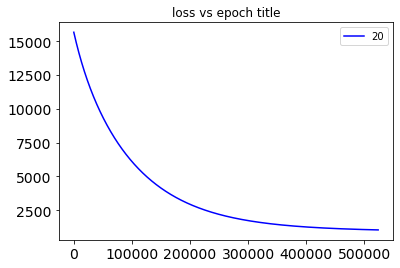

MSE = 6764.1872  using sklearn

------- for 50 samples in train set-------
MSE = 7991.2710  with closed-form solution
MSE = 584073.7004  with iterative solution


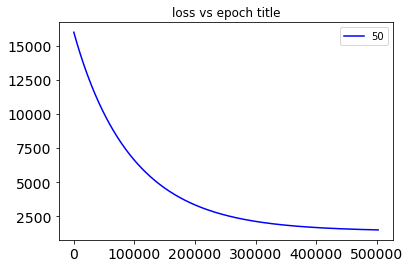

MSE = 7991.2710  using sklearn

------- for 100 samples in train set-------
MSE = 3583.0085  with closed-form solution
MSE = 6717934.7918  with iterative solution


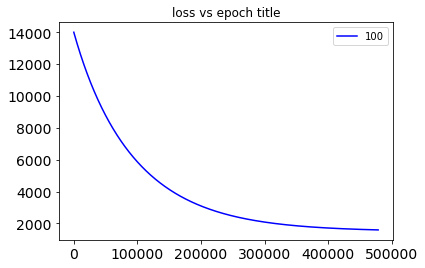

MSE = 3583.0085  using sklearn

------- for 200 samples in train set-------
MSE = 3028.4720  with closed-form solution
MSE = 3055246.9570  with iterative solution


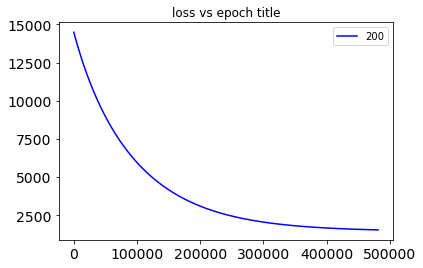

MSE = 3028.4720  using sklearn

------- for 300 samples in train set-------
MSE = 2877.9542  with closed-form solution
MSE = 1756262.9840  with iterative solution


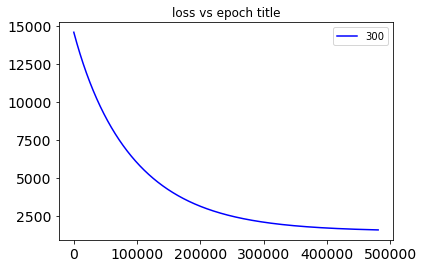

MSE = 2877.9542  using sklearn



In [91]:
n_train = [20, 50, 100, 200, 300]

for i in n_train:
    trainx, trainy, testx, testy = split_data(i)
    
    print ("------- for",i,'samples in train set-------')
    # add bais to the testx matrix 
    testx_with_b = np.append(np.ones((testx.shape[0],1)), testx, axis = 1)
    trainx_with_b = np.append(np.ones((trainx.shape[0],1)), trainx, axis = 1)
    
    # closed-form solution
    w_with_b = linear_regression_CF(trainx, trainy)
    y_hat = np.dot(testx_with_b, w_with_b)
    print('MSE = %0.4f '% mean_squared_error(testy, y_hat),'with closed-form solution')
    
    # iterative solution
    j_all, w_with_b = linear_regression_GD(trainx, trainy)
    y_hat = np.dot(testx_with_b, w_with_b)
    print('MSE = %0.4f '% mean_squared_error(testy, y_hat),'with iterative solution')
    plot_curves(j_all, "b", i, "title")
    
    # using library
    regr = feature_subset_regression(trainx, trainy, range(0,10))
    print('MSE = %0.4f '% mean_squared_error(testy, regr.predict(testx)),'using sklearn')
    print("")

In [92]:
n_train = [300]
for i in n_train:
    trainx, trainy, testx, testy = split_data(i)
    
    print ("------- parameter values using 300 training samples -------")
    print("")
    # add bais to the testx matrix 
    testx_with_b = np.append(np.ones((testx.shape[0],1)), testx, axis = 1)
    trainx_with_b = np.append(np.ones((trainx.shape[0],1)), trainx, axis = 1)
    
    # closed-form solution
    print ("------- closed-form solution -------")
    w_with_b = linear_regression_CF(trainx, trainy)
    print(w_with_b)
    y_hat = np.dot(testx_with_b, w_with_b)
    print("")
    
    # iterative solution
    print ("------- iterative solution -------")
    j_all, w_with_b = linear_regression_GD(trainx, trainy)
    print(w_with_b.reshape(11,))
    y_hat = np.dot(testx_with_b, w_with_b)
    print("")
    
    # using library
    print ("------- sklearn solution -------")
    regr = feature_subset_regression(trainx, trainy, range(0,10))
    print ("b = %0.4f "% regr.intercept_)
    print ("w = ", regr.coef_)
    

------- parameter values using 300 training samples -------

------- closed-form solution -------
[-3.47078541e+02 -7.17380506e-02 -2.36122373e+01  4.98061206e+00
  1.19041652e+00 -1.38509813e+00  9.64159178e-01  8.41966773e-01
  1.23980856e+01  6.32231239e+01  6.26955166e-01]

------- iterative solution -------
[ 1.39534022e+02 -8.18838300e-02 -9.01865522e+00  2.11431195e+01
  1.51782522e+01 -2.83742200e+00 -4.20231466e+00 -9.60644370e+00
  7.40099703e+00  1.57525533e+01  7.91549104e+00]

------- sklearn solution -------
b = -347.0785 
w =  [ -0.07173805 -23.61223728   4.98061206   1.19041652  -1.38509813
   0.96415918   0.84196677  12.39808558  63.22312394   0.62695517]
